In [43]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import dataset

In [44]:
total_duration = 30
clip_len = 3 #length of clip to visualise in seconds. Modify as you wish

#loading data sample. Feel free to try different spectrograms
spec = torch.from_numpy(np.load('ADL_DCASE_DATA/development/audio/a017_90_120.npy'))
print(spec.size())

torch.Size([60, 1501])


In [45]:
#getting subsection of spec determined by clip_len
time_steps = spec.size(-1)
print(f"time_steps:{time_steps}")
num_clips = total_duration // clip_len
print(f"num_clips:{num_clips}")
time_interval = int(time_steps // num_clips)
print(f"time_interval:{time_interval}")
spec = spec[:, :time_interval]
print(spec.size())

time_steps:1501
num_clips:10
time_interval:150
torch.Size([60, 150])


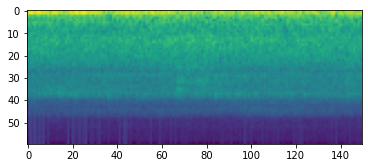

In [46]:
#Visualising spectrogram
plt.imshow(spec.numpy())

num_train_datapoints: 1170
each train_data[i] (where 0<i<1169) is a tuple consists of (tensor(.npy),class)
15 classes in total: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
each tensor(.npy) is of shape torch.Size([10, 60, 150])
there're 10 clips in each .npy file, where each clip has 60 frequency divisions and 150/3s duration

Below is the spectrogram of 1 clip


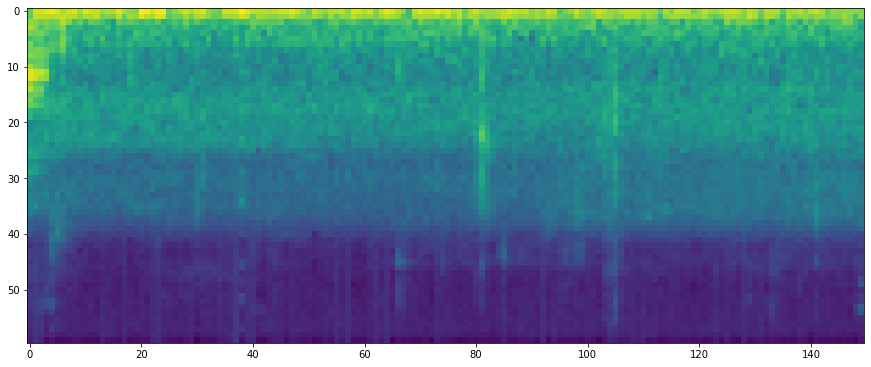

In [111]:
training_data = dataset.DCASE("ADL_DCASE_DATA/development",3)

print("num_train_datapoints:",len(training_data))
print("each train_data[i] (where 0<i<1169) is a tuple consists of (tensor(.npy),class)")

classes = [training_data[i][1] for i in range(len(training_data))]
print(f"{len(np.unique(classes))} classes in total:",np.unique(classes))

file_shape = training_data[0][0].shape
print(f"each tensor(.npy) is of shape {file_shape}")
print(f"there're {file_shape[0]} clips in each .npy file, where each clip has {file_shape[1]} frequency divisions and {file_shape[2]}/3s duration")

print("\nBelow is the spectrogram of 1 clip")
plt.figure(figsize=(15,15))
plt.imshow(training_data[0][0][0])